In [1]:
# import necessery library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# load the dataset
data = pd.read_csv("Diwali Sales Data.csv",encoding="latin1")
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
data.shape

(11251, 15)

In [4]:
# checking the info the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
data.Status.isnull().sum()

11251

In [6]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [7]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
# checking and removing duplicates value if any 
data.duplicated().sum()

8

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(11243, 13)

In [11]:
data.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
data['Amount'].fillna(data['Amount'].mean(), inplace=True)


In [13]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
# change the marital_status to binary 0 or 1 and change amount into float to integer
data['Amount'] = data['Amount'].astype('int')
data['Marital_Status']= data['Marital_Status'].astype('int')

data['Marital_Status'] = data['Marital_Status'].replace({0: "unmarried", 1:"married"})

In [15]:
# replace the gander F: "female" and m: "male"
data['Gender'] = data['Gender'].replace({"F":"Female" , "M":"Male"})

In [16]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,unmarried,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,Female,26-35,35,married,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,Female,26-35,35,married,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,Male,0-17,16,unmarried,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,Male,26-35,28,married,Gujarat,Western,Food Processing,Auto,2,23877


In [17]:
data[['Amount','Age','Orders']].describe()

,Amount,Age,Orders
count,11243.000000,11243.000000,11243.000000
mean,9454.084586,35.422841,2.488749
std,5218.940427,12.756369,1.114960
min,188.000000,12.000000,1.000000
25%,5444.000000,27.000000,1.000000
50%,8111.000000,33.000000,2.000000
75%,12672.000000,43.000000,3.000000
max,23952.000000,92.000000,4.000000


### EDA part fot visualizations the data 

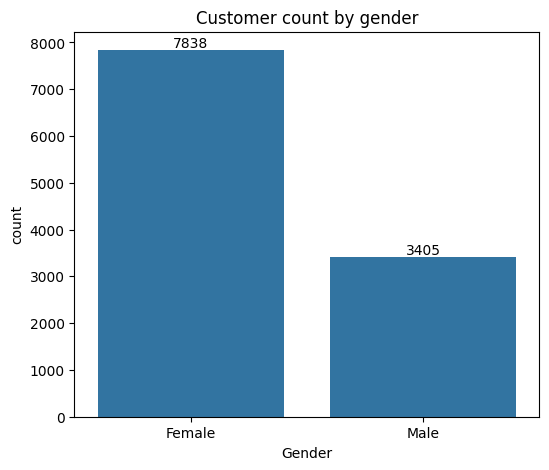

In [18]:
# Gender 
# In this part we will analyze the data base on the gender using count of orders and the total revenue amount.

plt.figure(figsize=(6,5))
gender_count = sns.countplot(x = "Gender", data = data)
plt.title("Customer count by gender")

for bar in gender_count.containers:
    gender_count.bar_label(bar)

plt.show()

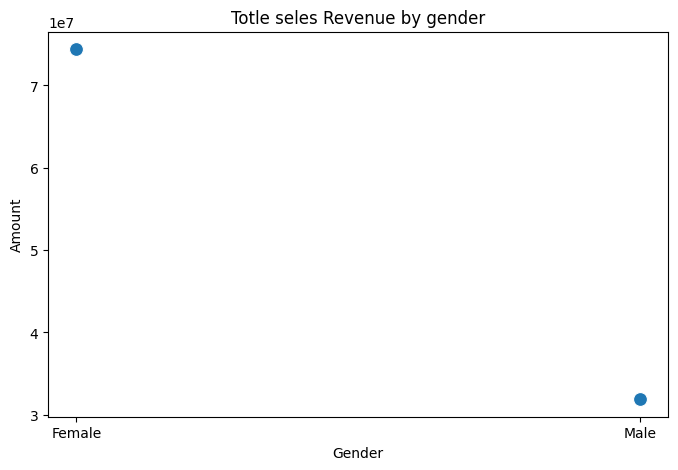

In [19]:
seles_gen = data.groupby(data['Gender'], as_index=False)['Amount'].sum().sort_values(by= "Amount",ascending=False)

plt.figure(figsize=(8,5))

sns.scatterplot(x = "Gender", y= "Amount",data= seles_gen, s= 100)
plt.title("Totle seles Revenue by gender")
plt.xlabel("Gender")
plt.show()


##### we can see that the purchasing power of female is much higher then male 

#### lets find out the Total count of customers in each age-group data

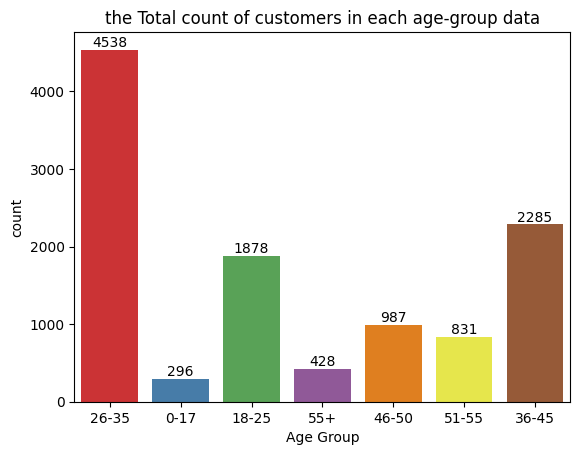

In [20]:
age_group_count = sns.countplot(x = "Age Group", data = data, palette = "Set1")
plt.title("the Total count of customers in each age-group data")

for bar in age_group_count.containers:
    age_group_count.bar_label(bar)

plt.show()

#### now plot the data for Total Revenue Generated by each Age-Group

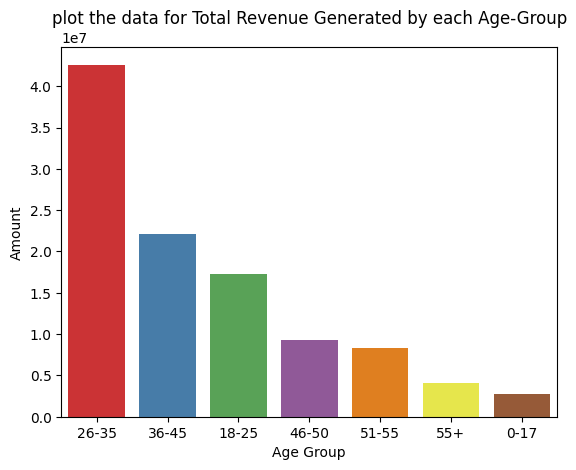

In [32]:
revenue_gen = data.groupby(data['Age Group'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending= False)

sns.barplot(x = "Age Group", y= "Amount", data= revenue_gen, palette="Set1")
plt.title("plot the data for Total Revenue Generated by each Age-Group")



plt.show()


#### We have devided the count of sales on basis of male and female so now we can check for the actuall number of male and femal in each age group

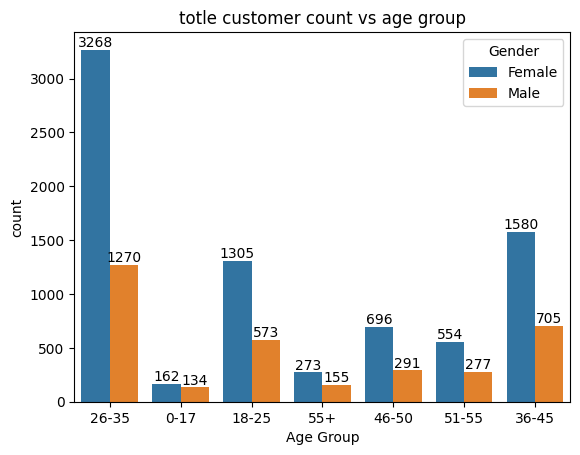

In [34]:
age_group_count = sns.countplot(x= "Age Group", data = data , hue = "Gender")

plt.title("totle customer count vs age group")

for bar in age_group_count.containers:
    age_group_count.bar_label(bar)

plt.show()

In [35]:
grouped_data = data.groupby("Age Group")

revenue_data = grouped_data['Amount'].sum()

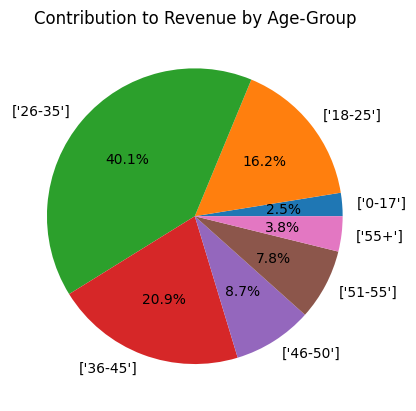

In [40]:
plt.pie(revenue_data,labels= grouped_data['Age Group'].unique(), autopct = "%1.1f%%")
plt.title("Contribution to Revenue by Age-Group")
plt.show()

In [41]:
# we create a new dataframe that name is df and shorting the age by ascending order

df = data.sort_values(by= "Age",ascending= True)

In [42]:
grouped_age_data = df.groupby("Age")

revenue_data_2 = grouped_age_data['Amount'].sum()

In [43]:
x = df['Age'].unique()
x

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
       80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92], dtype=int64)

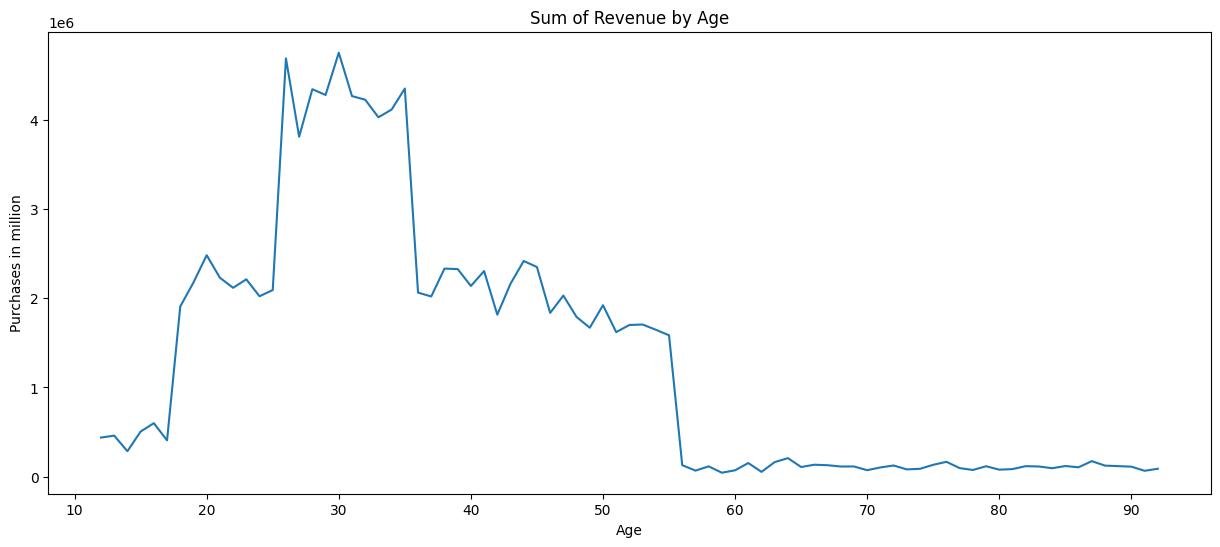

In [44]:
plt.figure(figsize= (15,6))
plt.plot(x, revenue_data_2)
plt.title("Sum of Revenue by Age")
plt.xlabel("Age")
plt.ylabel("Purchases in million")
plt.show()

#### Insights From Age

As we can see from the graph that age group of 30 and around 30 are purchasing more than the rest of consumers. Old age people are least active buyers

#### Now we will analyze the data to get the top 5 States that have highest sale



In [47]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [48]:
state_group = df.groupby("State")['Amount'].sum()
state_group

State
Andhra Pradesh       8046600
Bihar                4014669
Delhi               11632180
Gujarat              3957067
Haryana              4217871
Himachal Pradesh     4963368
Jharkhand            3026456
Karnataka           13532994
Kerala               3894491
Madhya Pradesh       8120050
Maharashtra         14413921
Punjab               1525800
Rajasthan            1909409
Telangana            1151490
Uttar Pradesh       19364963
Uttarakhand          2520944
Name: Amount, dtype: int32

In [50]:
# now lets check states details of other features
states_group = df.groupby("State").sum("Amount")
states_group

,User_ID,Age,Orders,Amount
State,,,,
Andhra Pradesh,814450215,28910,2054,8046600
Bihar,434276128,15388,1058,4014669
Delhi,1110458130,39389,2744,11632180
Gujarat,429280452,15534,1067,3957067
Haryana,452368496,15830,1106,4217871
Himachal Pradesh,609750920,21618,1568,4963368
Jharkhand,381174335,13564,953,3026456
Karnataka,1308891597,46055,3241,13532994
Kerala,454335141,15625,1137,3894491


#### Will plot a bar graph for states based on revenue generated



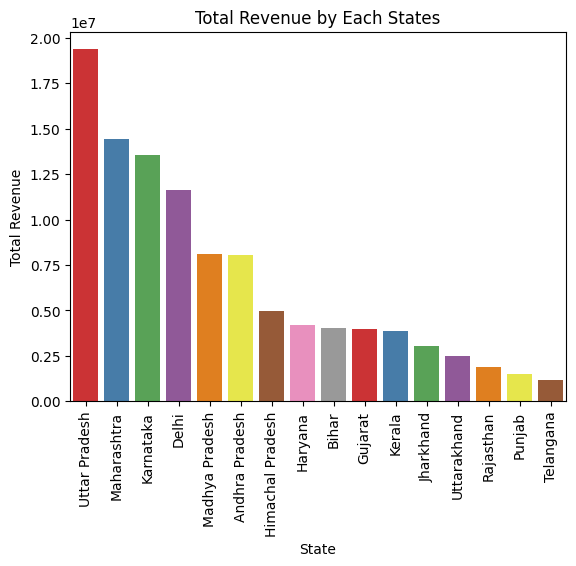

In [56]:
totle_revenue = df.groupby(['State'], as_index= False).sum("Amount").sort_values(by= "Amount",ascending=False)

states_plot = sns.barplot(x= "State", y = "Amount",data= totle_revenue, palette= "Set1")
plt.title("Total Revenue by Each States")
plt.xlabel("State")
plt.ylabel("Total Revenue")

plt.xticks(rotation = 90)
plt.show()

#### Will plot a bar graph for total orders placed by each States



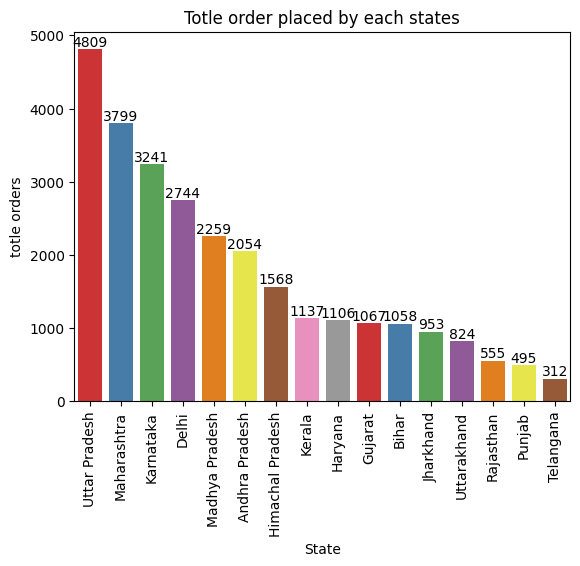

In [62]:
totle_order_state = df.groupby(['State'], as_index= False).sum("Orders").sort_values(by= "Orders",ascending = False)
state_plot = sns.barplot(x= "State",y= "Orders",data= totle_order_state, palette="Set1")
plt.title("Totle order placed by each states")
plt.xlabel("State")
plt.ylabel("totle orders")
plt.xticks(rotation= 90)

for bar in state_plot.containers:
    state_plot.bar_label(bar)

plt.show()

#### We can observe the graphs showing 5 states of India with highest sales, these states are Uttar Pradesh, Maharashtra, Karnataka, Dehli and Madhya Pradesh

#### Lets check the data for Average order price in each state and graph them



In [63]:
average_order = states_group['Amount']/states_group['Orders']

In [64]:
average_order.head()

State
Andhra Pradesh    3917.526777
Bihar             3794.583176
Delhi             4239.132653
Gujarat           3708.591378
Haryana           3813.626582
dtype: float64

In [66]:
x= states_group

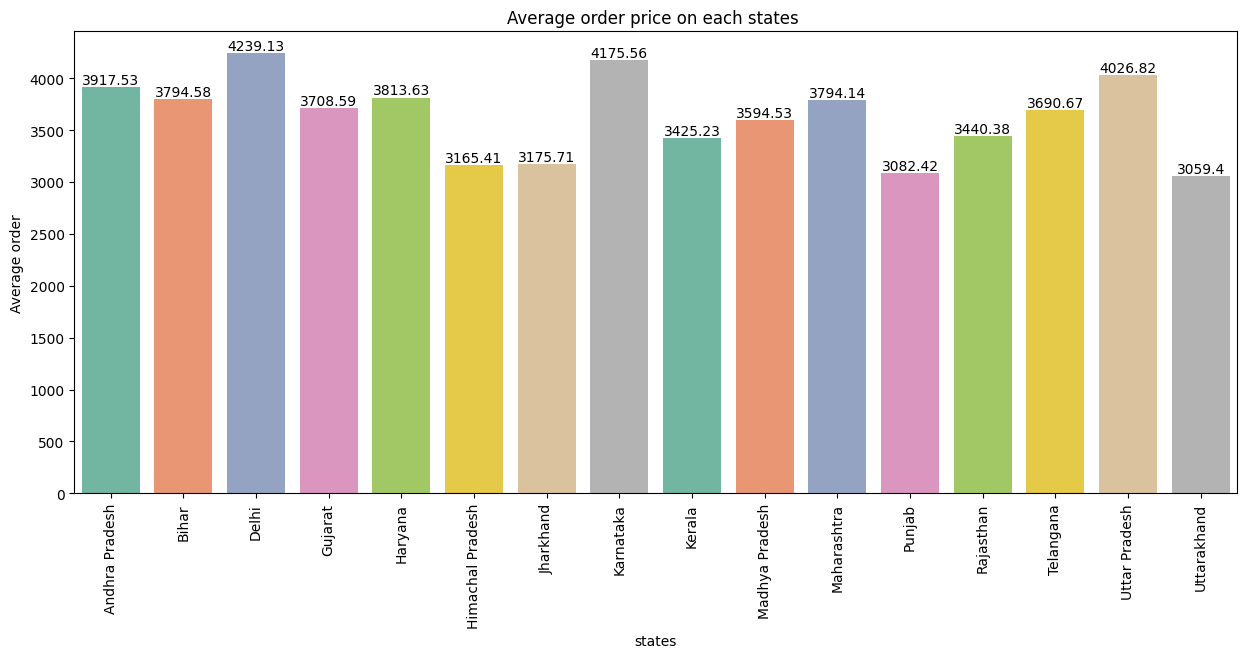

In [77]:
plt.figure(figsize= (15,6))
state_plot = sns.barplot(x= states_group.index, y = average_order, data = states_group, palette ="Set2")
plt.title("Average order price on each states ")
plt.xlabel("states")
plt.ylabel("Average order")
plt.xticks(rotation= 90)

for bar in state_plot.containers:
    state_plot.bar_label(bar)



#### Although Maharasthra is leading state in generating more sales revenue but for per unit cost Dehli is at the top of list. This can be either due to the high average price charged in Dehli as compare to other states or Dehli people are purchasing more luxurios items costing them high prices.

#### Marital Status
Graph the data for Total Revenue Generated by different marital status of customer



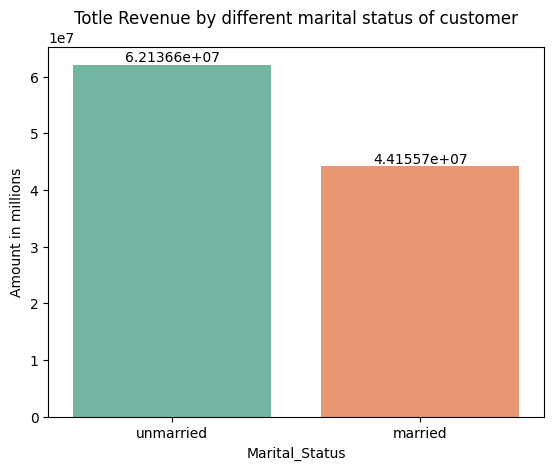

In [82]:
# plotting a bar graph for different marital status and see if there is any trend in the data for the married and unmarried 
status = df.groupby(['Marital_Status'], as_index= False).sum("Amount").sort_values(by= "Amount",ascending= False)

status_plot = sns.barplot(x = "Marital_Status",y = "Amount", data= status, palette= "Set2")

for bar in status_plot.containers:
    status_plot.bar_label(bar)

plt.title("Totle Revenue by different marital status of customer")
plt.ylabel("Amount in millions")
plt.show()

##### Plot a bar graph for different marital status and see if there is any trend in the data for the married and unmarried based on the gender.

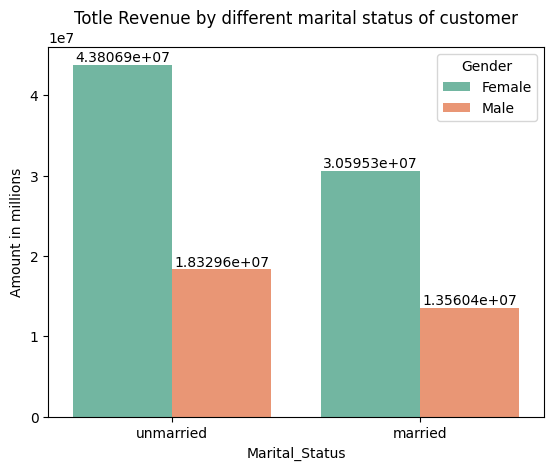

In [86]:
status = df.groupby(['Marital_Status',"Gender"], as_index= False).sum("Amount").sort_values(by= "Amount",ascending= False)

status_plot = sns.barplot(x = "Marital_Status",y = "Amount", data= status, palette= "Set2", hue= "Gender")

for bar in status_plot.containers:
    status_plot.bar_label(bar)

plt.title("Totle Revenue by different marital status of customer")
plt.ylabel("Amount in millions")
plt.show()

#### From the above graph and we can analyze that the most of sales are coming from Unmarried females and then second highest contribution to the sale is Married female



### Now we will see persons from which occupation is more likely to praticipate in diwali sales offer.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Lawyer'),
  Text(2, 0, 'IT Sector'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Media'),
  Text(5, 0, 'Textile'),
  Text(6, 0, 'Hospitality'),
  Text(7, 0, 'Aviation'),
  Text(8, 0, 'Chemical'),
  Text(9, 0, 'Govt'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Automobile'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Food Processing'),
  Text(14, 0, 'Construction')])

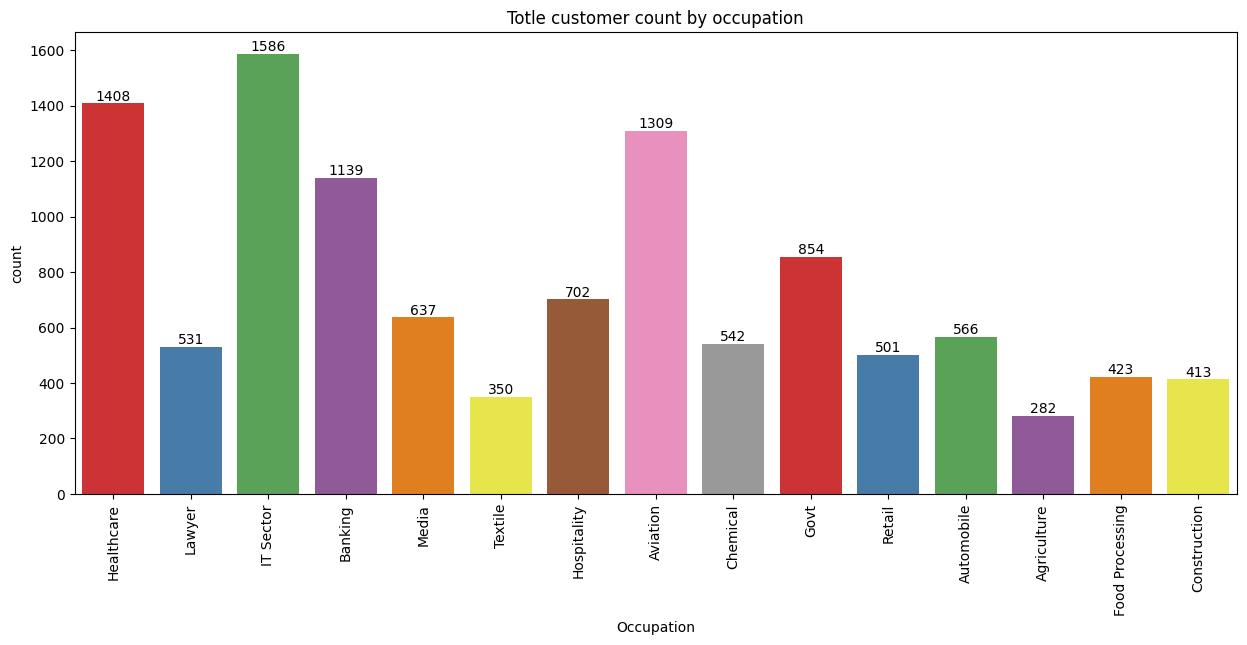

In [94]:
plt.figure(figsize= (15,6))
occupation_status = df.groupby(['Occupation'], as_index= False).sum("Amount").sort_values(by="Amount",ascending= False)

occupation_plot = sns.countplot(x= "Occupation", data= df, palette="Set1")
plt.title("Totle customer count by occupation")

for bar in occupation_plot.containers:
    occupation_plot.bar_label(bar)

plt.xticks(rotation= 90)


#### Now we will check the top 5 Occupations that are contributing most to the revenue



([0, 1, 2, 3, 4],
 [Text(0, 0, 'IT Sector'),
  Text(1, 0, 'Aviation'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Banking'),
  Text(4, 0, 'Govt')])

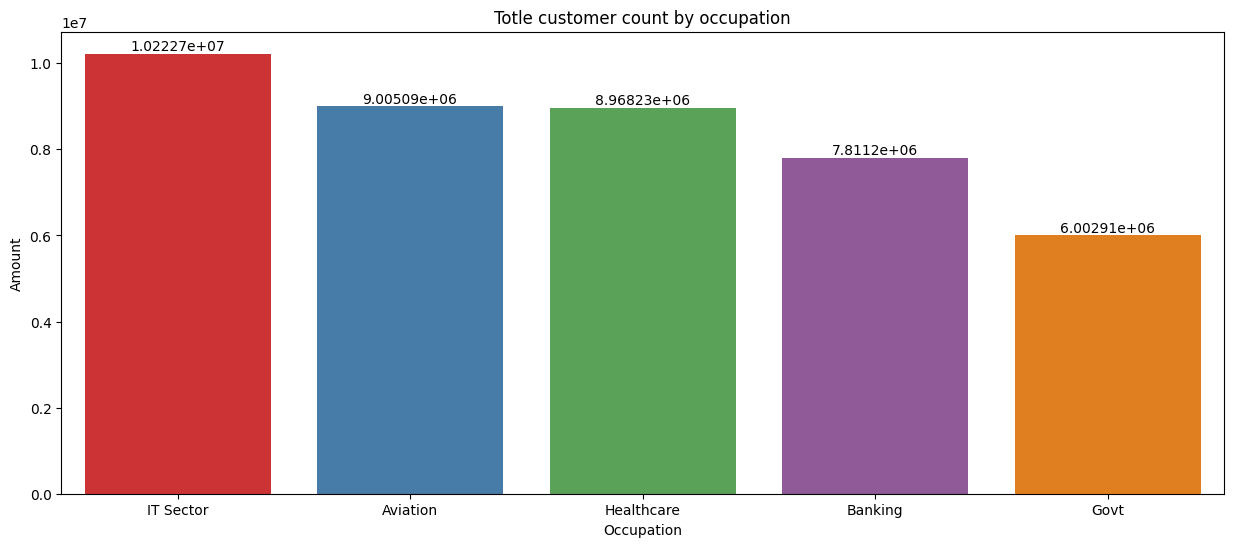

In [98]:
plt.figure(figsize= (15,6))
occupation_status = df.groupby(['Occupation',"Gender"], as_index= False).sum("Amount").sort_values(by="Amount",ascending= False).head(5)

occupation_plot = sns.barplot(x= "Occupation",y = "Amount", data= occupation_status, palette="Set1")
plt.title("Totle customer count by occupation")

for bar in occupation_plot.containers:
    occupation_plot.bar_label(bar)

plt.xticks(rotation= 0)

### As we observe the graph we noticed that the IT Sector generats the highest sales revenue and after that Aviation, Healthcare and then Banking and so on.

#### Product Category
In order to see the sales of each category product we will use the data and check for the top 5 categories of product which has highest sales and which are contributing most to the total sales.

plot a column graph to see which products have highest orders

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Food'),
  Text(3, 0, 'Electronics & Gadgets'),
  Text(4, 0, 'Games & Toys'),
  Text(5, 0, 'Sports Products'),
  Text(6, 0, 'Office'),
  Text(7, 0, 'Veterinary'),
  Text(8, 0, 'Stationery'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Auto'),
  Text(11, 0, 'Household items'),
  Text(12, 0, 'Pet Care'),
  Text(13, 0, 'Footwear & Shoes'),
  Text(14, 0, 'Books'),
  Text(15, 0, 'Decor'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Hand & Power Tools')])

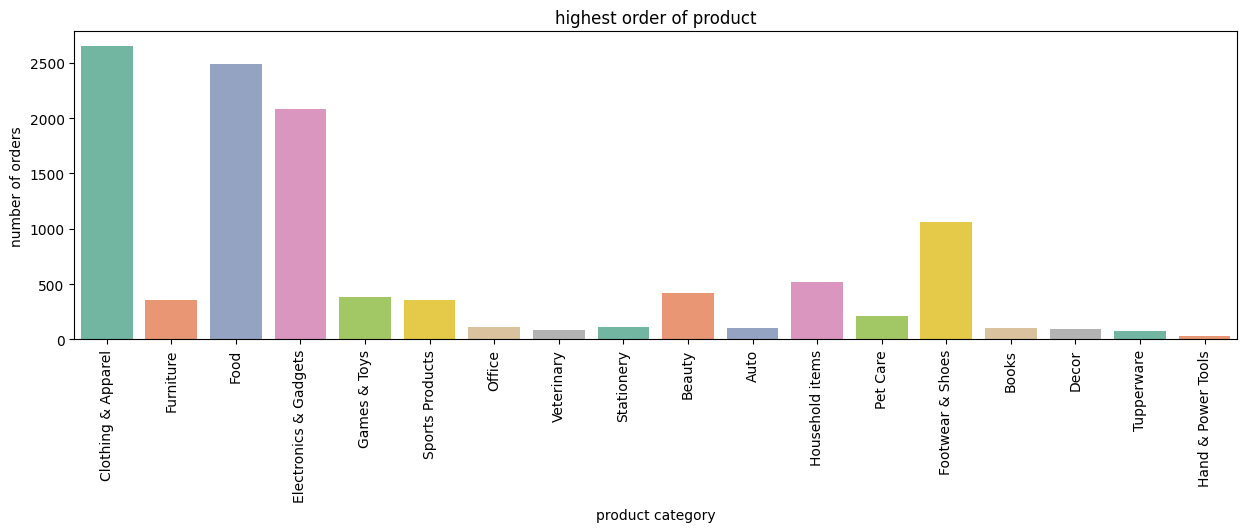

In [104]:
plt.figure(figsize= (15,4))
sns.countplot(x="Product_Category",data= df,palette= "Set2")
plt.title("highest order of product")
plt.xlabel("product category")
plt.ylabel("number of orders")
plt.xticks(rotation= 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Food'),
  Text(3, 0, 'Electronics & Gadgets'),
  Text(4, 0, 'Games & Toys'),
  Text(5, 0, 'Sports Products'),
  Text(6, 0, 'Office'),
  Text(7, 0, 'Veterinary'),
  Text(8, 0, 'Stationery'),
  Text(9, 0, 'Beauty'),
  Text(10, 0, 'Auto'),
  Text(11, 0, 'Household items'),
  Text(12, 0, 'Pet Care'),
  Text(13, 0, 'Footwear & Shoes'),
  Text(14, 0, 'Books'),
  Text(15, 0, 'Decor'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Hand & Power Tools')])

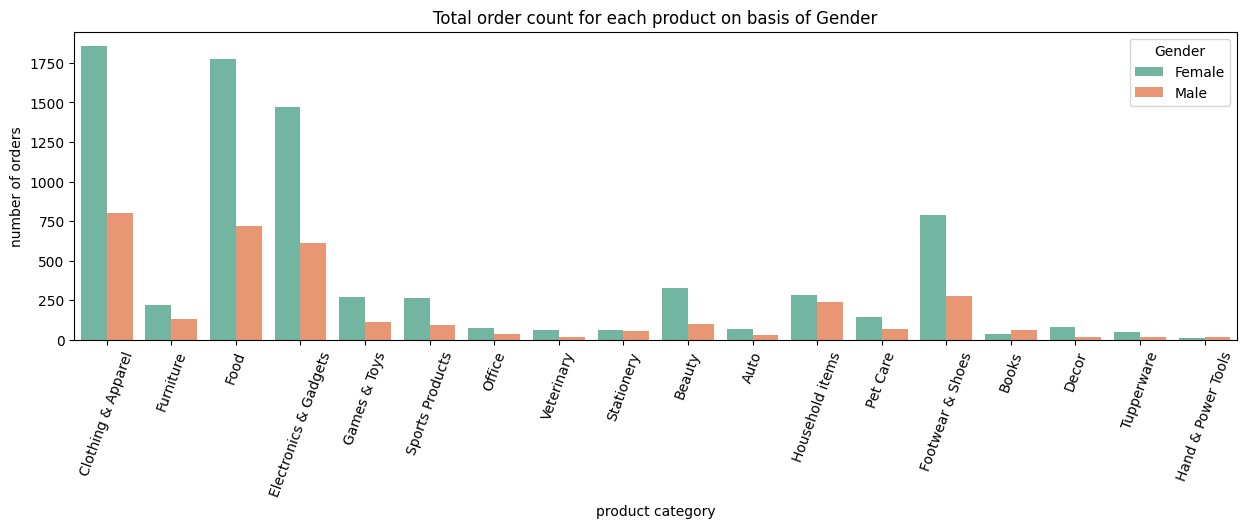

In [107]:
# ploting the graph on the basis of the gander 

plt.figure(figsize= (15,4))
sns.countplot(x="Product_Category",data= df,palette= "Set2",hue= "Gender")
plt.title("Total order count for each product on basis of Gender")
plt.xlabel("product category")
plt.ylabel("number of orders")
plt.xticks(rotation= 70)

#### Now will graph the data to see which products are generating most sales revenue



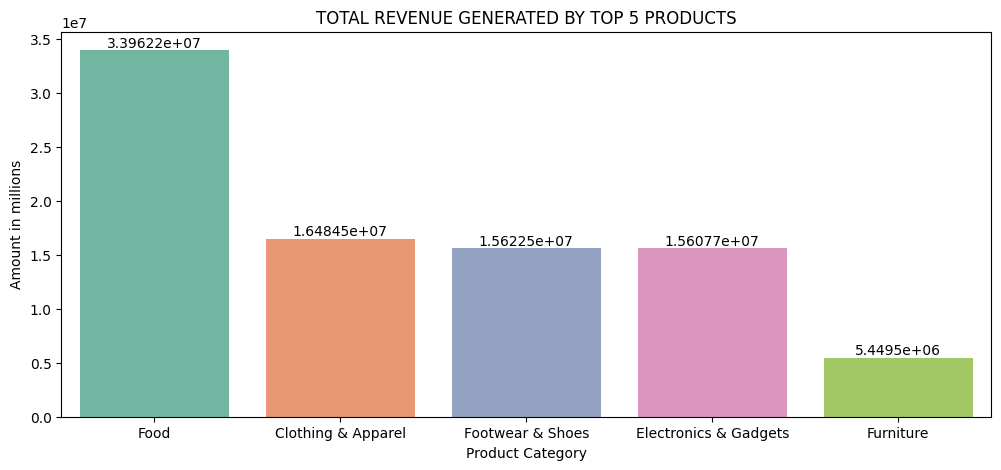

In [110]:
plt.figure(figsize= (12,5))
product = df.groupby(['Product_Category'], as_index= False).sum("Amount").sort_values(by= "Amount", ascending= False).head(5)

product_sales = sns.barplot(x = "Product_Category", y = "Amount", data= product, palette="Set2")
plt.title("TOTAL REVENUE GENERATED BY TOP 5 PRODUCTS")
plt.xlabel("Product Category")
plt.ylabel("Amount in millions")

for bar in product_sales.containers:
    product_sales.bar_label(bar)

plt.show()


#### We can see a little deflection in data for the product category. For clothing & Apparel the number of order is the highest but for revenue generation Food is the highest contributor.

### Insights of the data 


females are participating and are more interested in dewali sales than men. Also the purchasing power of Female is higher than male as the total sales revenue generated from female is much higher than that of male.

Most of the customers fall in age group of 26-35. Customers from age group of 26-35 are generating the more than 40% of total Revenue

Age group of 30 and around 30 are purchasing more than the rest of consumers. Old age people are least active buyers.

Top 5 states of India with highest sales are Uttar Pradesh, Maharashtra, Karnataka, Dehli and Mahya Pradesh.

we can analyze that the most of sales are coming from Unmarried and among them unmarried females are the customers with highest spendings.

IT Sector generats the highest sales revenue and after that Aviation, Healthcare and then Banking and so on.

We can see a little deflection in data for the product category. For clothing & Apparel the number of order is the highest but for revenue generation Food is the highest contributor.